# Sander van de Kamp
#### 500734351 
#### 26/05/2021
# Dense Neural Network

Ongebruikte code van project voor het gebruik van een neuraal netwerk om websites te classificeren

---

Het probleem dat door middel van een Neuraal netwerk probeert opgelost te worden is het classiferen van teksten aan de hand van meegegeven labels. De texten zijn van websites af gescraped en hebben al vectoren met getallen voor elk woord, hierdoor kan het NN om gaan met de data en hierop trainen. Het doel is om aan de hand van de mee gegeven vectors met woorden te bepalen wat de classificatie is van de website waar de woorden vandaan komen.

| getal | label |
| --- | :--- |
| 0 | Solar Energy |
| 1 | Green Energy |
| 2 | Water Qaulity |
| 3 | Air Qaulity |
| 4 | Public Participation |
| 5 | Environment |
| 6 | Heating |

In [1]:
from keras.layers import Dense, Dropout, Embedding, Flatten, LSTM
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Loads in the given dataset and removes sites that don't have any keywords (sites are already scraped)
df_sites = pd.read_json('scraped_sites.json')
df_sites = df_sites.loc[df_sites['keywords'] != {}]
df_sites.fillna('None', inplace = True)

def dict_from_column_values(df, column):
    values = df[column].unique()
    dict_values = dict(zip(range(len(values)), values))
    return dict_values

columns = ['theme', 'geo_level', 'type_of_action', 'challenge_1', 'type_of_tool']

themes = dict_from_column_values(df_sites, 'theme')
geo_levels = dict_from_column_values(df_sites, 'geo_level')
type_of_action = dict_from_column_values(df_sites, 'type_of_action')
challenge_1 = dict_from_column_values(df_sites, 'challenge_1')
type_of_tool = dict_from_column_values(df_sites, 'type_of_tool')

temp = [themes, geo_levels, type_of_action, challenge_1, type_of_tool]
num_keywords = len(themes) + len(geo_levels) + len(type_of_action) + len(challenge_1) + len(type_of_tool)
col_length = {'theme': len(themes), 'geo_level': len(geo_levels), 'type_of_action': len(type_of_action), 'challenge_1': len(challenge_1), 'type_of_tool': len(type_of_tool)}

# %% Drops sites with less than 50 total words, since they are practically unusable
def sum(array): 
    sum = 0
    for value in array:
        sum = sum + value  

    return sum

df_sites['total_words'] = df_sites['keywords'].apply(lambda x: sum(x))
df_sites = df_sites.drop(df_sites[df_sites['total_words'] < 50].index)
df_sites.drop('total_words', inplace = True, axis = 1)

# Split de data in train en test data
One Hot Encode de labels voor de y waardes en zet de woorden om van een dictionary met aantallen naar een list.

In [2]:
df_outcomes = pd.get_dummies(df_sites['theme'])

# Seperates the training and testing data and transforms it into numpy arrays
df_test = pd.DataFrame(df_sites['keywords'].to_list())
df_test.dropna()
X_train, X_test, y_train, y_test = train_test_split(df_test.values, df_outcomes.astype('float32').values, test_size = 0.2, random_state = 3)
X_train = np.asarray(X_train).astype(np.int)
X_test = np.asarray(X_test).astype(np.int)
y_train = np.asarray(y_train).astype(np.int)
y_test = np.asarray(y_test).astype(np.int)
print(f'({X_train.shape}, {X_test.shape}), ({y_train.shape}, {y_test.shape}')

((73, 2875), (19, 2875)), ((73, 7), (19, 7)


# Maakt een NN model
Andere hoeveelheiden aan lagen of andere activatiefuncties maakten geen verschil.

In [5]:
model = Sequential()
model.add(Dense(2875, activation = 'softmax', input_shape = (0, 2875)))
model.add(Dense(7, activation = 'softmax')) # output (thema, type, challenge1, challenge2, type of tool)
model.compile(metrics = ['accuracy'], optimizer = 'adam', loss = 'mean_squared_error') 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 0, 2875)           8268500   
_________________________________________________________________
dense_5 (Dense)              (None, 0, 7)              20132     
Total params: 8,288,632
Trainable params: 8,288,632
Non-trainable params: 0
_________________________________________________________________


# Traint het model

Epoch 1/50
2/2 [==============================] - 1s 369ms/step - loss: 0.1225 - accuracy: 0.2683 - val_loss: 0.1224 - val_accuracy: 0.5333
Epoch 2/50
2/2 [==============================] - 0s 153ms/step - loss: 0.1222 - accuracy: 0.4781 - val_loss: 0.1223 - val_accuracy: 0.5333
Epoch 3/50
2/2 [==============================] - 0s 127ms/step - loss: 0.1219 - accuracy: 0.5219 - val_loss: 0.1221 - val_accuracy: 0.5333
Epoch 4/50
2/2 [==============================] - 0s 180ms/step - loss: 0.1218 - accuracy: 0.5438 - val_loss: 0.1220 - val_accuracy: 0.5333
Epoch 5/50
2/2 [==============================] - 0s 167ms/step - loss: 0.1216 - accuracy: 0.5136 - val_loss: 0.1219 - val_accuracy: 0.5333
Epoch 6/50
2/2 [==============================] - 0s 149ms/step - loss: 0.1214 - accuracy: 0.6325 - val_loss: 0.1217 - val_accuracy: 0.5333
Epoch 7/50
2/2 [==============================] - 0s 167ms/step - loss: 0.1212 - accuracy: 0.6128 - val_loss: 0.1215 - val_accuracy: 0.6000
Epoch 8/50
2/2 [====

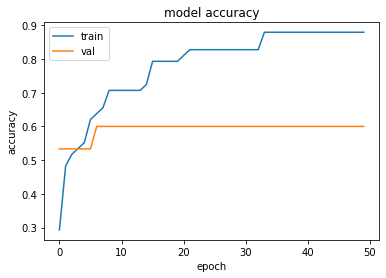

In [6]:
# %% plots and trains the Neural network and shows the learning curve
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluatie

Meer lagen maakten geen enkel verschil in de prestaties van het model, wat een indicatie is dat een Neuraal Netwerk voor dit probleem niet nodig kan zijn. Alleen kan het ook betekenen dat de dataset in dit geval niet goed bruikbaar is, wat in dit geval hoogst waarschijnlijk waar is. aangezien er maar 80 rijen zijn waar op getraint zijn. Daarbovenop zijn deze 80 waardes ook nog eens slecht verdeelt, aangezien 40% het "Green Energy" label heeft en 5% "Water Quality" en "Air Quality" zijn. Hierdoor zal het model flink scheef getraint worden, wat het lastig maakt om een goede accuracy te halen.

Een mogelijkheid is om het model te verbeteren, aangezien het met teksten werkt, is om het model om te zetten naar een RNN die gespecialiseerd is in text verwerking. Daarnaast kan er dan ook gebruik gemaakt worden van een embedding layer, die al eerder getraint is om teksten te analyseren.